In [1]:
import pandas as pd

# Load the file into a DataFrame
data = pd.read_csv('csv_files/amz_uk_price_prediction_dataset.csv')


### Part 1: Understanding Product Categories


In [2]:
""""
**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

"""


'"\n**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?\n\n1. **Frequency Tables**:\n    - Generate a frequency table for the product `category`.\n    - Which are the top 5 most listed product categories?\n\n'

In [3]:
unique_categories = data['category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 296


In [4]:
# Generate a frequency table for the product category
category_frequency = data['category'].value_counts()
print(category_frequency)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [5]:
#Which are the top 5 most listed product categories?
print(category_frequency.head(5))

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [6]:
"""
2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
"""

'\n2. **Visualizations**:\n    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*\n    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?\n'

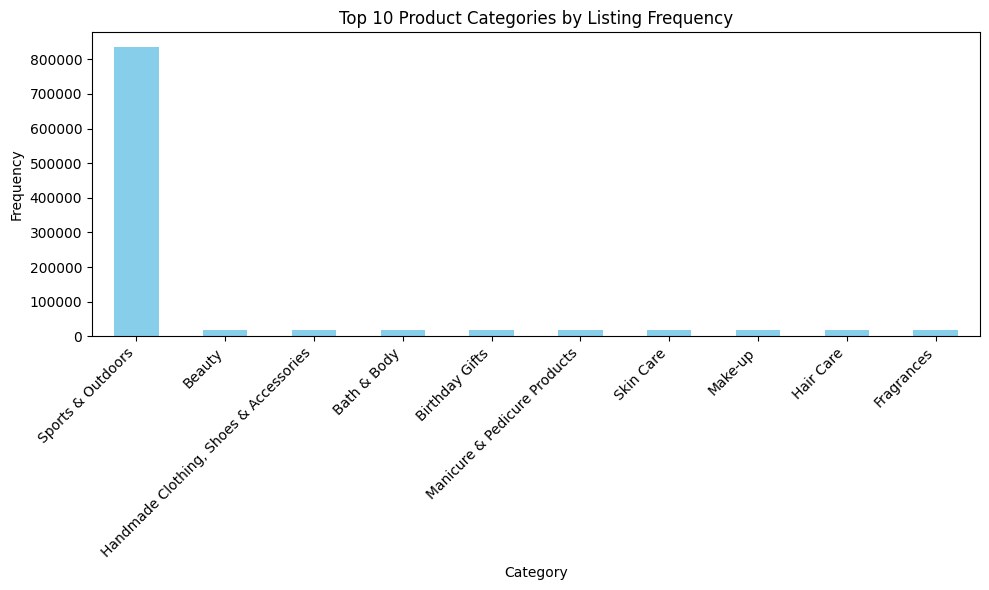

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of products across different categories
category_frequency.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

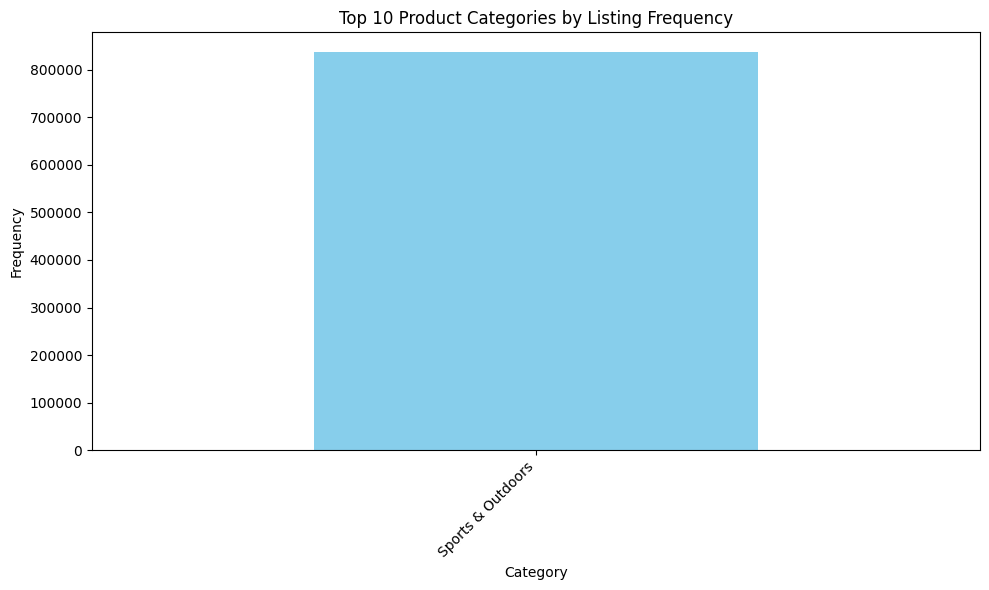

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of products across different categories
category_frequency.head(1).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

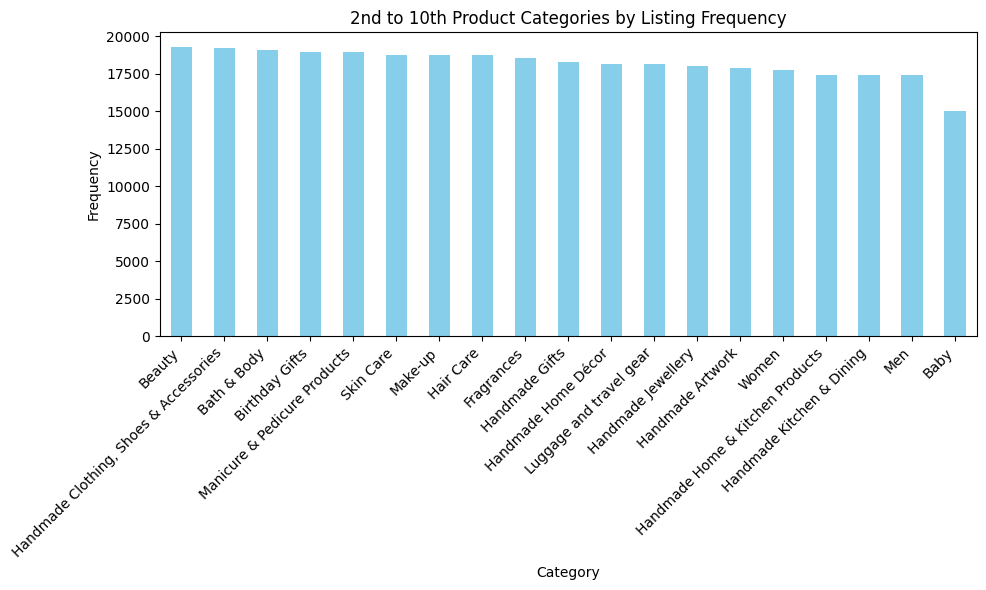

In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of products across categories from 2nd to 10th place
category_frequency.iloc[1:20].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('2nd to 10th Product Categories by Listing Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

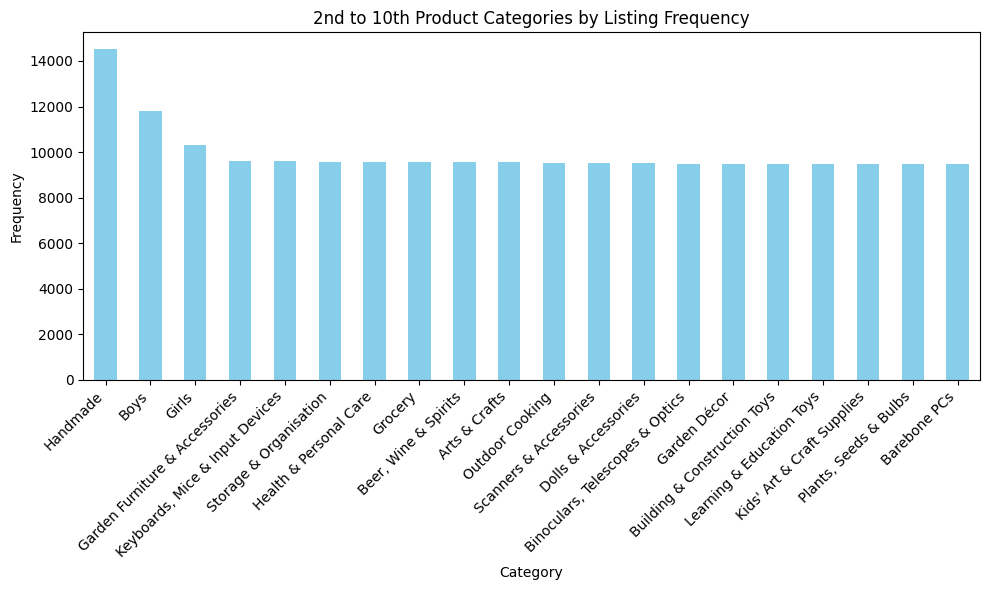

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of products across categories from 2nd to 10th place
category_frequency.iloc[20:40].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('2nd to 10th Product Categories by Listing Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

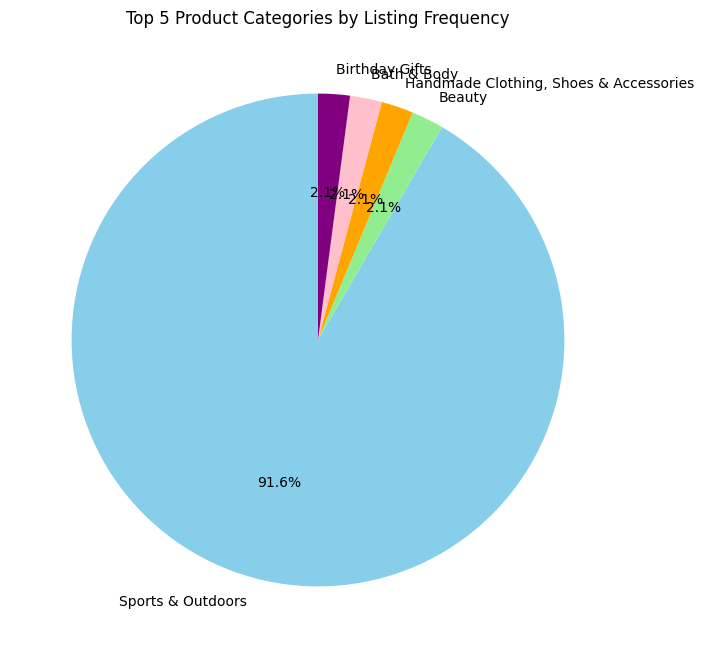

In [11]:
# Generate a pie chart for the top 5 categories
top_5_categories = category_frequency.head(5)
top_5_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink', 'purple'])
plt.title('Top 5 Product Categories by Listing Frequency')
plt.ylabel('')  # Remove the y-axis label for better visualization
plt.show()

In [12]:
# findings: 91.6% of products are in Sports & Outdoors category.


### Part 2: Delving into Product Pricing

"""
**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?
"""

In [13]:
# Calculate the mean price
mean_price_overall = data['price'].mean().round(2)
print(f"Mean Price: {mean_price_overall}")

# Calculate the median price
median_price_overall = data['price'].median().round(2)
print(f"Median Price: {median_price_overall}")

# Calculate the mode price
mode_price_overall = data['price'].mode().iloc[0].round(2)
print(f"Mode Price: {mode_price_overall}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


In [14]:
# Calculate the overall mean price
overall_mean_price = data['price'].mean().round(2)
print(f"Mean: {overall_mean_price}")

# Calculate the overall mode price
overall_mode_price = data['price'].mode().iloc[0].round(2)
print(f"Mode: {overall_mode_price}")

Mean: 89.24
Mode: 9.99


In [15]:
# Calculate the mean price for each of the top 5 categories
mean_price = data[data['category'].isin(top_5_categories.index)].groupby('category')['price'].mean().round(2)
print(mean_price)

category
Bath & Body                                15.04
Beauty                                     13.22
Birthday Gifts                             26.59
Handmade Clothing, Shoes & Accessories     16.87
Sports & Outdoors                         125.77
Name: price, dtype: float64


In [16]:
# Calculate the median price for each of the top 5 categories
median_price = data[data['category'].isin(top_5_categories.index)].groupby('category')['price'].median().round(2)
print(median_price)

category
Bath & Body                               11.70
Beauty                                     8.99
Birthday Gifts                            14.25
Handmade Clothing, Shoes & Accessories     8.99
Sports & Outdoors                         23.30
Name: price, dtype: float64


In [17]:
# Calculate the mode price for each of the top 5 categories
import pandas as pd

mode_prices = []

for category, group in data[data['category'].isin(top_5_categories.index)].groupby('category'):
    mode_value = group['price'].mode()
   
    if not mode_value.empty:
        mode_value = mode_value.iloc[0]
    mode_prices.append((category, round(mode_value, 2)))

print(mode_prices)

[('Bath & Body', np.float64(9.99)), ('Beauty', np.float64(9.99)), ('Birthday Gifts', np.float64(16.99)), ('Handmade Clothing, Shoes & Accessories', np.float64(2.5)), ('Sports & Outdoors', np.float64(12.99))]


In [18]:
"""
2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?
"""

'\n2. **Measures of Dispersion**:\n    - Determine the variance, standard deviation, range, and interquartile range for product `price`.\n    - How varied are the product prices? Are there any indicators of a significant spread in prices?\n'

In [19]:
# Variance
variance_price = data['price'].var().round(2)
print(f"Variance: {variance_price}")

# Standard Deviation
std_dev_price = data['price'].std().round(2)
print(f"Standard Deviation: {std_dev_price}")

# Range
range_price = (data['price'].max() - data['price'].min()).round(2)
print(f"Range: {range_price}")

# Interquartile Range (IQR)
q1 = data['price'].quantile(0.25).round(2)
q3 = data['price'].quantile(0.75).round(2)
iqr_price = (q3 - q1).round(2)
print(f"IQR: {iqr_price}")

Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.0
IQR: 36.0


In [20]:
"""
1. **Variance**: `variance_price` = 119445.49  
    - A high variance indicates a significant spread in prices.

2. **Standard Deviation**: `std_dev_price` = 345.61  
    - A large standard deviation suggests that prices deviate significantly from the mean.

3. **Range**: `range_price` = 100000.0  
    - The range is extremely large, indicating a wide spread between the lowest and highest prices.

4. **Interquartile Range (IQR)**: `iqr_price` = 36.0  
    - The IQR is relatively small compared to the range, suggesting that most prices are concentrated within a narrower middle range, but there are extreme outliers.

These metrics collectively indicate that product prices are highly varied, with a significant spread caused by extreme outliers.
"""

'\n1. **Variance**: `variance_price` = 119445.49  \n    - A high variance indicates a significant spread in prices.\n\n2. **Standard Deviation**: `std_dev_price` = 345.61  \n    - A large standard deviation suggests that prices deviate significantly from the mean.\n\n3. **Range**: `range_price` = 100000.0  \n    - The range is extremely large, indicating a wide spread between the lowest and highest prices.\n\n4. **Interquartile Range (IQR)**: `iqr_price` = 36.0  \n    - The IQR is relatively small compared to the range, suggesting that most prices are concentrated within a narrower middle range, but there are extreme outliers.\n\nThese metrics collectively indicate that product prices are highly varied, with a significant spread caused by extreme outliers.\n'

In [21]:
"""
3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 
"""

'\n3. **Visualizations**:\n    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.\n    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. \n'

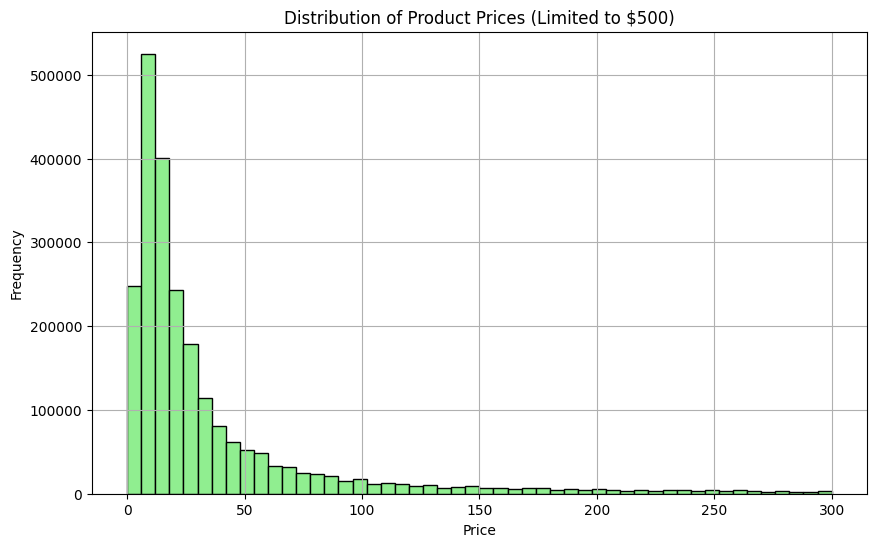

In [22]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data[data['price'] <= 300]['price'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Product Prices (Limited to $500)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


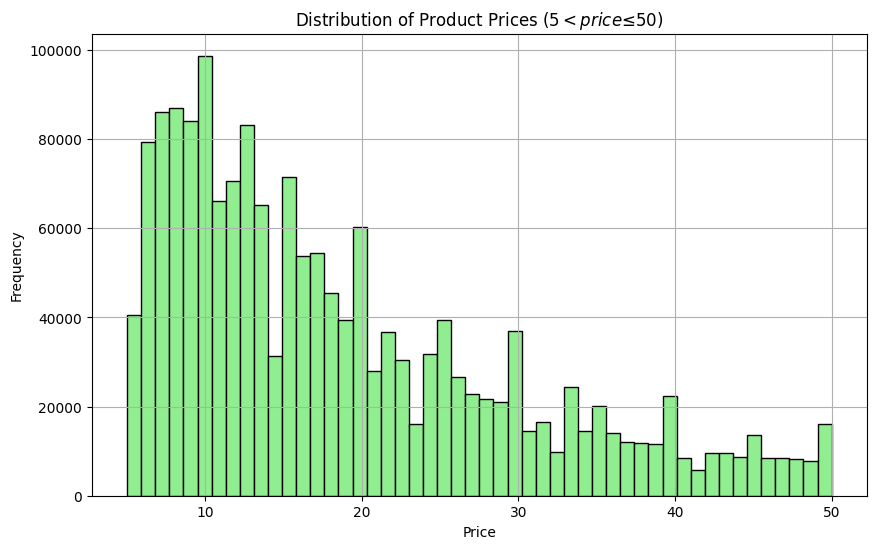

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data[(data['price'] > 5) & (data['price'] <= 50)]['price'].hist(
    bins=50, color='lightgreen', edgecolor='black'
)
plt.title('Distribution of Product Prices ($5 < price ≤ $50)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [24]:
# The problem of reading the histograms, have been solved by limiting the price to $500. And in other case, the price is limited to $50. 
# findings: the price The most common price is around 10 pounds. Due to the bins size, reading percisely the price is possible only for the last histogram.

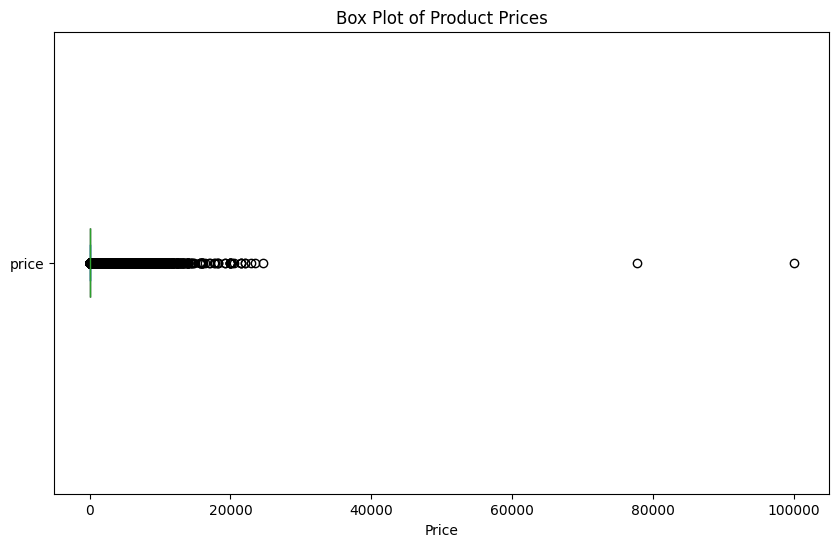

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['price'].plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

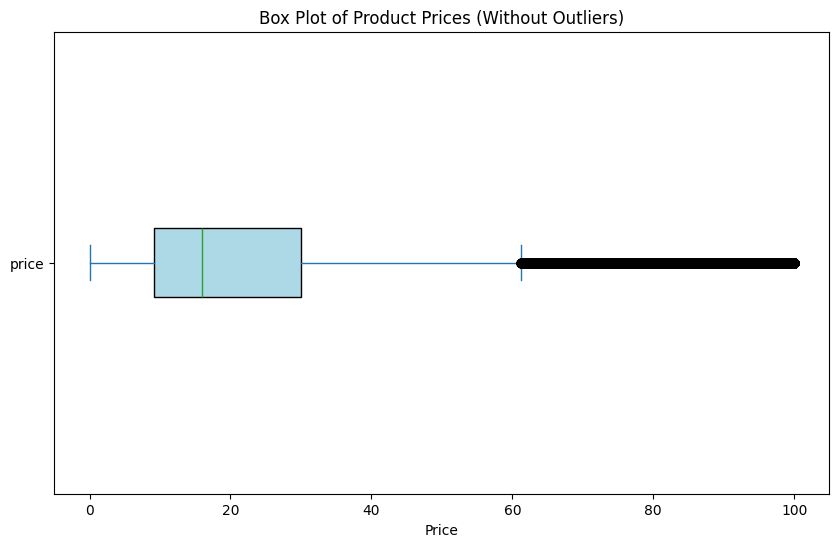

In [26]:
import matplotlib.pyplot as plt

# Define the lower and upper bounds for outlier removal
lower_bound = q1 - 1.5 * iqr_price
upper_bound = q3 + 1.5 * iqr_price

# Filter the data to exclude outliers
filtered_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Plot the box plot for the filtered data
plt.figure(figsize=(10, 6))
filtered_data['price'].plot(kind='box', vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Product Prices (Without Outliers)')
plt.xlabel('Price')
plt.show()

### Part 3: Unpacking Product Ratings


**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?



In [27]:
# Calculate the mean rating
mean_rating = data['stars'].mean().round(2)
print(f"Mean Rating: {mean_rating}")

# Calculate the median rating
median_rating = data['stars'].median().round(2)
print(f"Median Rating: {median_rating}")

# Calculate the mode rating
mode_rating = data['stars'].mode().iloc[0].round(2)
print(f"Mode Rating: {mode_rating}")

Mean Rating: 2.15
Median Rating: 0.0
Mode Rating: 0.0


In [28]:
# Filter out ratings with 0.0
filtered_ratings = data[data['stars'] > 0.0]['stars']

# Calculate the mean rating
mean_rating_excluding_zero = filtered_ratings.mean().round(2)
print(f"Mean Rating (excluding 0.0): {mean_rating_excluding_zero}")

# Calculate the median rating
median_rating_excluding_zero = filtered_ratings.median().round(2)
print(f"Median Rating (excluding 0.0): {median_rating_excluding_zero}")

# Calculate the mode rating
mode_rating_excluding_zero = filtered_ratings.mode().iloc[0].round(2)
print(f"Mode Rating (excluding 0.0): {mode_rating_excluding_zero}")

Mean Rating (excluding 0.0): 4.32
Median Rating (excluding 0.0): 4.4
Mode Rating (excluding 0.0): 4.5


In [29]:
# findings: generaly costumers do not rate the products. But when filtering out 0.0 rating, which is unratet, the meanrating is 4.32, mode - 4.5, median - 4.4.

In [30]:
"""
2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?
"""

'\n2. **Measures of Dispersion**:\n    - Determine the variance, standard deviation, and interquartile range for product `rating`.\n    - Are the ratings consistent, or is there a wide variation in customer feedback?\n'

In [31]:
# Variance
variance_rating = data['stars'].var().round(2)
print(f"Variance: {variance_rating}")

# Standard Deviation
std_dev_rating = data['stars'].std().round(2)
print(f"Standard Deviation: {std_dev_rating}")

# Interquartile Range (IQR)
q1_rating = data['stars'].quantile(0.25).round(2)
q3_rating = data['stars'].quantile(0.75).round(2)
iqr_rating = (q3_rating - q1_rating).round(2)
print(f"IQR: {iqr_rating}")

Variance: 4.82
Standard Deviation: 2.19
IQR: 4.4


In [32]:
# findings: there is a wide variation in customer feedback. Variance 4.82, standard deviation 2.19, IQR 4.4

In [33]:
"""
3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?
"""

'\n3. **Shape of the Distribution**:\n    - Calculate the skewness and kurtosis for the `rating` column. \n    - Are the ratings normally distributed, or do they lean towards higher or lower values?\n'

In [34]:
from scipy.stats import skew, kurtosis

# Calculate skewness
skewness_rating = skew(data['stars'], nan_policy='omit')
print(f"Skewness: {skewness_rating:.2f}")

# Calculate kurtosis
kurtosis_rating = kurtosis(data['stars'], nan_policy='omit')
print(f"Kurtosis: {kurtosis_rating:.2f}")

Skewness: 0.08
Kurtosis: -1.93


In [35]:
#findings: The ratings are positively skewed, leaning towards lower values. The ratings have a platykurtic distribution, with fewer extreme values.

In [36]:
"""
4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
"""

'\n4. **Visualizations**:\n    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?\n'

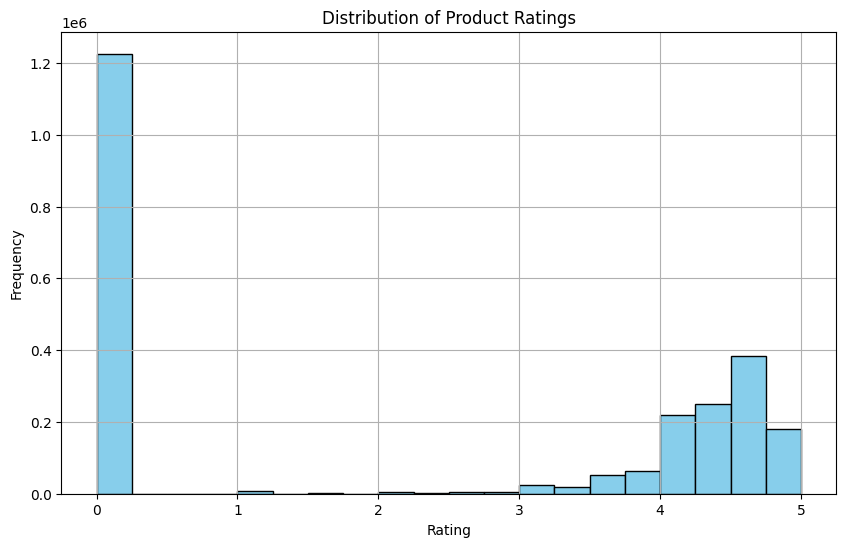

In [37]:
import matplotlib.pyplot as plt

# Plot a histogram for product ratings
plt.figure(figsize=(10, 6))
data['stars'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

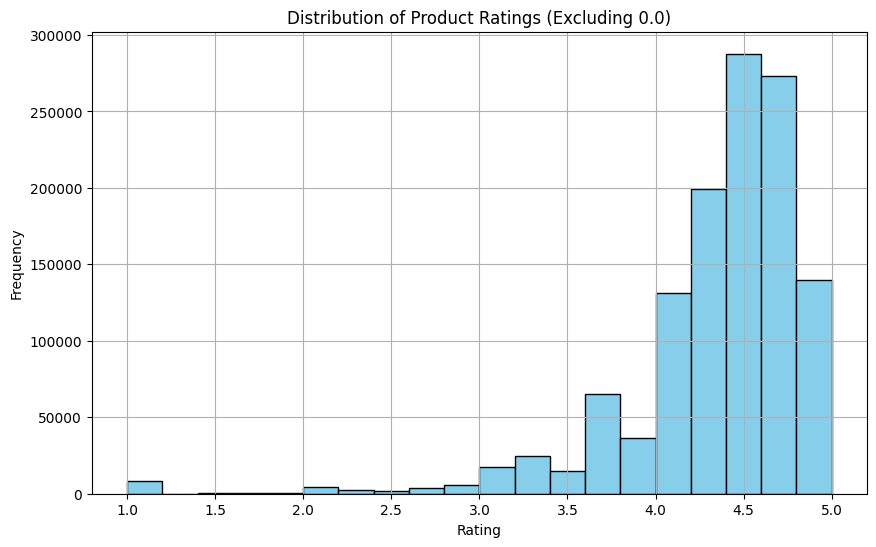

In [38]:
import matplotlib.pyplot as plt

# Plot a histogram for product ratings excluding 0.0
plt.figure(figsize=(10, 6))
filtered_ratings.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings (Excluding 0.0)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [39]:
#Findings: the most common ratings is 0.0. But exculding it the most common rating is 4.5 